# CS7641 Machine Learning - Assignment #2

## Randomized Optimization
## nthangavelu7

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import itertools
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

#import mlrose
import mlrose_hiive as ml
import mlrose_hiive as mlrose

### Solve 3 optimization problem using the following optimization algorithms
1.Randomized hill climbing
2.Simulated annealing
3.Genetic algorithm
4.MIMIC

### Problem # 1 : Four-peaks problem

Four peaks
Running algorithm for size 10
Running algorithm for size 30
Running algorithm for size 50
Running algorithm for size 70
Running algorithm for size 90
Running algorithm for size 110
Running algorithm for size 130
Running algorithm for size 150
Running algorithm for size 170
Running algorithm for size 190
RHC Total time in s:  [0.0, 0.004971027374267578, 0.01511693000793457, 0.0030171871185302734, 0.010133028030395508, 0.00503087043762207, 0.005322933197021484, 0.0, 0.005530595779418945, 0.0]
RHC Best fit of algorithm:  [10.0, 30.0, 45.0, 7.0, 15.0, 6.0, 1.0, 5.0, 7.0, 3.0]
SA Total time in s:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
SA Best fit of algorithm:  [18.0, 56.0, 94.0, 68.0, 170.0, 103.0, 130.0, 147.0, 105.0, 119.0]
GA Total time in s:  [0.9656493663787842, 1.5650250911712646, 2.5420496463775635, 3.444669723510742, 6.77932596206665, 8.881365776062012, 8.442806482315063, 14.37673568725586, 18.72024917602539, 21.07884454727173]
GA Best fit of algorithm:  [18

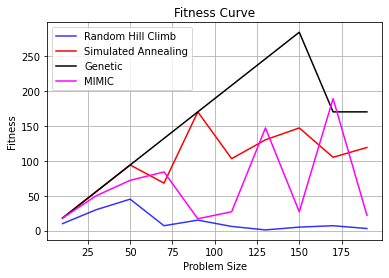

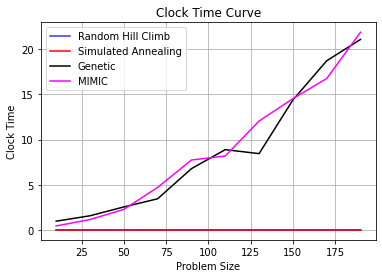

In [20]:
fitness_rhc = []
fitness_sa = []
fitness_ga = []
fitness_mimic = []

iterations_rhc = []
iterations_sa = []
iterations_ga = []
iterations_mimic = []

time_rhc = []
time_sa = []
time_ga = []
time_mimic = []

four_peaks_range = range(10, 200, 20)
fitness = mlrose.FourPeaks(t_pct=0.1)
exp_decay = mlrose.ExpDecay()

print("Four peaks")

for index_range in four_peaks_range:
    #Problem
    init_state = np.random.randint(2, size=index_range)
    problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)
        
    print ("Running algorithm for size " + str(index_range))

    #Experiment
    #--------------------------Random hill Climb algorithm--------------------------
    start_time = time.time()
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
                        problem, init_state=init_state, max_attempts=100, max_iters=10000, curve=True)

    end_time = time.time()

    rhc_total_time = end_time-start_time
    time_rhc.append(rhc_total_time)
    
    iterations_rhc.append(len(fitness_curve_rhc))
    fitness_rhc.append(best_fitness_rhc)

    #--------------------------Simulated annealing algorithm--------------------------
    start_time = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
                                 problem, schedule = exp_decay, init_state = init_state,
                                 max_attempts = 100, max_iters = 10000,curve=True)

    sa_total_time = end_time-start_time
    time_sa.append(sa_total_time)
    
    iterations_sa.append(len(fitness_curve_sa))
    fitness_sa.append(best_fitness_sa)



    #--------------------------Genetic algorithm--------------------------
    start_time = time.time()
    best_state_genetic, best_fitness_genetic, fitness_curve_genetic = mlrose.genetic_alg(
                    problem, max_attempts=100, curve=True)
    end_time = time.time()

    genetic_total_time = end_time-start_time
    time_ga.append(genetic_total_time)
    
    iterations_ga.append(len(fitness_curve_genetic))
    fitness_ga.append(best_fitness_genetic)



    #--------------------------MIMIC algorithm--------------------------   
    start_time = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(
                    problem, pop_size=200, max_attempts=100, curve=True)
    end_time = time.time()

    mimic_total_time = end_time-start_time
    time_mimic.append(mimic_total_time)
    iterations_mimic.append(len(fitness_curve_mimic))
    fitness_mimic.append(best_fitness_mimic)


print('RHC Total time in s: ', time_rhc)
print('RHC Best fit of algorithm: ', fitness_rhc)

print('SA Total time in s: ', time_sa)
print('SA Best fit of algorithm: ', fitness_sa)

print('GA Total time in s: ', time_ga)
print('GA Best fit of algorithm: ', fitness_ga)

print('MIMIC Total time in s: ', time_mimic)
print('MIMIC Best fit of algorithm: ', fitness_mimic)


problem_name = "four_peaks"

a_fitness_rhc = np.array(fitness_rhc)
a_fitness_sa = np.array(fitness_sa)
a_fitness_ga = np.array(fitness_ga)
a_fitness_mimic = np.array(fitness_mimic)

plt.figure()
plt.title('Fitness Curve')

plt.plot(four_peaks_range, a_fitness_rhc, label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(four_peaks_range, a_fitness_sa, label = 'Simulated Annealing', color= 'red')
plt.plot(four_peaks_range, a_fitness_ga, label = 'Genetic', color = 'black')
plt.plot(four_peaks_range, a_fitness_mimic, label = 'MIMIC', color = 'magenta')
plt.grid()
plt.xlabel('Problem Size')
plt.ylabel('Fitness')

plt.legend(loc="best")
plt.savefig(problem_name + '_problemsize_' + '_fitness.png', bbox_inches="tight")

a_time_rhc = np.array(time_rhc)
a_time_sa = np.array(time_sa)
a_time_ga = np.array(time_ga)
a_time_mimic = np.array(time_mimic)

plt.figure()
plt.title('Clock Time Curve')

plt.plot(four_peaks_range, a_time_rhc, label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(four_peaks_range, a_time_sa, label = 'Simulated Annealing', color= 'red')
plt.plot(four_peaks_range, a_time_ga, label = 'Genetic', color = 'black')
plt.plot(four_peaks_range, a_time_mimic, label = 'MIMIC', color = 'magenta')
plt.grid()
plt.xlabel('Problem Size')
plt.ylabel('Clock Time')

plt.legend(loc="best")
plt.savefig(problem_name + '_problemsize_' + '_clock_time.png', bbox_inches="tight")


total_time = np.sum(a_time_rhc)
best_filt = np.ndarray.max(a_fitness_rhc)

print('RHC Total time in s: ', total_time)
print('RHC Best fit of algorithm: ', best_filt)

total_time = np.sum(a_time_sa)
best_filt = np.ndarray.max(a_fitness_sa)

print('sa Total time in s: ', total_time)
print('sa Best fit of algorithm: ', best_filt)

total_time = np.sum(a_time_ga)
best_filt = np.ndarray.max(a_fitness_ga)

print('ga Total time in s: ', total_time)
print('ga Best fit of algorithm: ', best_filt)

total_time = np.sum(a_time_mimic)
best_filt = np.ndarray.max(a_fitness_mimic)

print('mimic Total time in s: ', total_time)
print('mimic Best fit of algorithm: ', best_filt)




### Problem 2 : Continuous Peaks problem

Continuous Peaks
Running algorithm for size 10
Running algorithm for size 30
Running algorithm for size 50
Running algorithm for size 70
Running algorithm for size 90
Running algorithm for size 110
Running algorithm for size 130
Running algorithm for size 150
Running algorithm for size 170
Running algorithm for size 190
RHC Total time in s:  [0.0030007362365722656, 0.009002208709716797, 0.003987550735473633, 0.025986433029174805, 0.006001710891723633, 0.008010625839233398, 0.010116338729858398, 0.015002012252807617, 0.01501011848449707, 0.014516115188598633]
RHC Best fit of algorithm:  [17.0, 45.0, 69.0, 41.0, 9.0, 11.0, 13.0, 11.0, 13.0, 8.0]
SA Total time in s:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
SA Best fit of algorithm:  [18.0, 56.0, 92.0, 132.0, 169.0, 109.0, 130.0, 144.0, 146.0, 157.0]
GA Total time in s:  [1.2344868183135986, 2.7796523571014404, 4.171277284622192, 10.060006856918335, 4.987143039703369, 5.529524803161621, 15.348045825958252, 13.114770889282227, 25

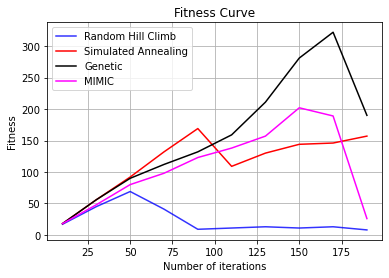

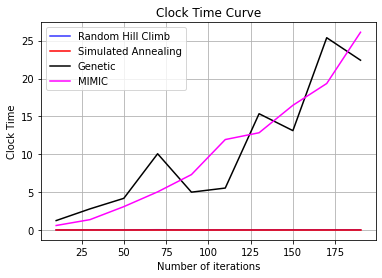

In [3]:
fitness_rhc = []
fitness_sa = []
fitness_ga = []
fitness_mimic = []

iterations_rhc = []
iterations_sa = []
iterations_ga = []
iterations_mimic = []

time_rhc = []
time_sa = []
time_ga = []
time_mimic = []

fitness = mlrose.ContinuousPeaks(t_pct=0.1)

continuous_peaks_range = range(10, 200, 20)
exp_decay = mlrose.ExpDecay()

print("Continuous Peaks")

for index_range in continuous_peaks_range:
    #Problem
    init_state = np.random.randint(2, size=index_range)
    problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)
    
    print ("Running algorithm for size " + str(index_range))
        
    #Experiment
    #--------------------------Random hill Climb algorithm--------------------------
    start_time = time.time()
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
                        problem, init_state=init_state, max_attempts=100, max_iters=10000, curve=True)

    end_time = time.time()

    rhc_total_time = end_time-start_time
    time_rhc.append(rhc_total_time)
    
    iterations_rhc.append(len(fitness_curve_rhc))
    fitness_rhc.append(best_fitness_rhc)

    #--------------------------Simulated annealing algorithm--------------------------
    start_time = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
                                 problem, schedule = exp_decay, init_state = init_state,
                                 max_attempts = 100, max_iters = 10000,curve=True)

    sa_total_time = end_time-start_time
    time_sa.append(sa_total_time)
    
    iterations_sa.append(len(fitness_curve_sa))
    fitness_sa.append(best_fitness_sa)



    #--------------------------Genetic algorithm--------------------------
    start_time = time.time()
    best_state_genetic, best_fitness_genetic, fitness_curve_genetic = mlrose.genetic_alg(
                    problem, max_attempts=100, curve=True)
    end_time = time.time()

    genetic_total_time = end_time-start_time
    time_ga.append(genetic_total_time)
    
    iterations_ga.append(len(fitness_curve_genetic))
    fitness_ga.append(best_fitness_genetic)



    #--------------------------MIMIC algorithm--------------------------   
    start_time = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(
                    problem, pop_size=200, max_attempts=100, curve=True)
    end_time = time.time()

    mimic_total_time = end_time-start_time
    time_mimic.append(mimic_total_time)
    iterations_mimic.append(len(fitness_curve_mimic))
    fitness_mimic.append(best_fitness_mimic)


print('RHC Total time in s: ', time_rhc)
print('RHC Best fit of algorithm: ', fitness_rhc)

print('SA Total time in s: ', time_sa)
print('SA Best fit of algorithm: ', fitness_sa)

print('GA Total time in s: ', time_ga)
print('GA Best fit of algorithm: ', fitness_ga)

print('MIMIC Total time in s: ', time_mimic)
print('MIMIC Best fit of algorithm: ', fitness_mimic)


problem_name = "Continuous_Peaks"

a_fitness_rhc = np.array(fitness_rhc)
a_fitness_sa = np.array(fitness_sa)
a_fitness_ga = np.array(fitness_ga)
a_fitness_mimic = np.array(fitness_mimic)

plt.figure()
plt.title('Fitness Curve')

plt.plot(continuous_peaks_range, a_fitness_rhc, label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(continuous_peaks_range, a_fitness_sa, label = 'Simulated Annealing', color= 'red')
plt.plot(continuous_peaks_range, a_fitness_ga, label = 'Genetic', color = 'black')
plt.plot(continuous_peaks_range, a_fitness_mimic, label = 'MIMIC', color = 'magenta')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')

plt.legend(loc="best")
plt.savefig(problem_name +'_problemsize_' + '_fitness.png', bbox_inches="tight")

a_time_rhc = np.array(time_rhc)
a_time_sa = np.array(time_sa)
a_time_ga = np.array(time_ga)
a_time_mimic = np.array(time_mimic)

plt.figure()
plt.title('Clock Time Curve')

plt.plot(continuous_peaks_range, a_time_rhc, label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(continuous_peaks_range, a_time_sa, label = 'Simulated Annealing', color= 'red')
plt.plot(continuous_peaks_range, a_time_ga, label = 'Genetic', color = 'black')
plt.plot(continuous_peaks_range, a_time_mimic, label = 'MIMIC', color = 'magenta')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Clock Time')

plt.legend(loc="best")
plt.savefig(problem_name +'_problemsize_' + '_clock_time.png', bbox_inches="tight")

print('RHC Total time in s: ', np.sum(a_time_rhc))
print('RHC Best fit of algorithm: ', np.ndarray.max(a_fitness_rhc))

print('SA Total time in s: ', np.sum(a_time_sa))
print('SA Best fit of algorithm: ', np.ndarray.max(a_fitness_sa))

print('GA Total time in s: ', np.sum(a_time_ga))
print('GA Best fit of algorithm: ', np.ndarray.max(a_fitness_ga))

print('MIMIC Total time in s: ', np.sum(a_time_mimic))
print('MIMIC Best fit of algorithm: ', np.ndarray.max(a_fitness_mimic))


### Problem 3 - FlipFlop problem

FlipFlop
Running algorithm for size 10
Running algorithm for size 30
Running algorithm for size 50
Running algorithm for size 70
Running algorithm for size 90
Running algorithm for size 110
Running algorithm for size 130
Running algorithm for size 150
Running algorithm for size 170
Running algorithm for size 190
RHC Total time in s:  [0.00500178337097168, 0.00898289680480957, 0.022006511688232422, 0.030045747756958008, 0.06487083435058594, 0.1348121166229248, 0.10665392875671387, 0.1414351463317871, 0.14852452278137207, 0.24022293090820312]
RHC Best fit of algorithm:  [8.0, 21.0, 40.0, 57.0, 79.0, 91.0, 103.0, 117.0, 131.0, 155.0]
SA Total time in s:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
SA Best fit of algorithm:  [9.0, 29.0, 49.0, 68.0, 87.0, 107.0, 121.0, 145.0, 164.0, 184.0]
GA Total time in s:  [1.449937343597412, 2.6411333084106445, 5.955261945724487, 5.386873960494995, 7.404973030090332, 9.359840393066406, 11.12995719909668, 15.52974247932434, 14.804745435714722, 21

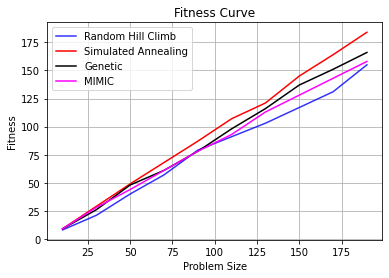

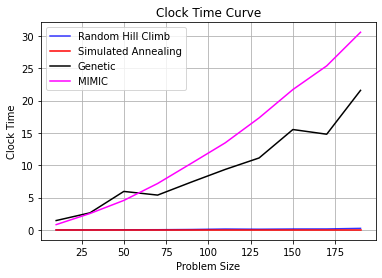

In [4]:
fitness_rhc = []
fitness_sa = []
fitness_ga = []
fitness_mimic = []

iterations_rhc = []
iterations_sa = []
iterations_ga = []
iterations_mimic = []

time_rhc = []
time_sa = []
time_ga = []
time_mimic = []

fitness = mlrose.FlipFlop()

flipflop_range = range(10, 200, 20)
exp_decay = mlrose.ExpDecay()

print("FlipFlop")

for index_range in flipflop_range:
    #Problem
    init_state = np.random.randint(2, size=index_range)
    problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)
    
    print ("Running algorithm for size " + str(index_range))
        
    #Experiment
    #--------------------------Random hill Climb algorithm--------------------------
    start_time = time.time()
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
                        problem, init_state=init_state, max_attempts=100, max_iters=10000, curve=True)

    end_time = time.time()

    rhc_total_time = end_time-start_time
    time_rhc.append(rhc_total_time)
    
    iterations_rhc.append(len(fitness_curve_rhc))
    fitness_rhc.append(best_fitness_rhc)

    #--------------------------Simulated annealing algorithm--------------------------
    start_time = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
                                 problem, schedule = exp_decay, init_state = init_state,
                                 max_attempts = 100, max_iters = 10000,curve=True)

    sa_total_time = end_time-start_time
    time_sa.append(sa_total_time)
    
    iterations_sa.append(len(fitness_curve_sa))
    fitness_sa.append(best_fitness_sa)



    #--------------------------Genetic algorithm--------------------------
    start_time = time.time()
    best_state_genetic, best_fitness_genetic, fitness_curve_genetic = mlrose.genetic_alg(
                    problem, max_attempts=100, curve=True)
    end_time = time.time()

    genetic_total_time = end_time-start_time
    time_ga.append(genetic_total_time)
    
    iterations_ga.append(len(fitness_curve_genetic))
    fitness_ga.append(best_fitness_genetic)



    #--------------------------MIMIC algorithm--------------------------   
    start_time = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(
                    problem, pop_size=200, max_attempts=100, curve=True)
    end_time = time.time()

    mimic_total_time = end_time-start_time
    time_mimic.append(mimic_total_time)
    iterations_mimic.append(len(fitness_curve_mimic))
    fitness_mimic.append(best_fitness_mimic)


print('RHC Total time in s: ', time_rhc)
print('RHC Best fit of algorithm: ', fitness_rhc)

print('SA Total time in s: ', time_sa)
print('SA Best fit of algorithm: ', fitness_sa)

print('GA Total time in s: ', time_ga)
print('GA Best fit of algorithm: ', fitness_ga)

print('MIMIC Total time in s: ', time_mimic)
print('MIMIC Best fit of algorithm: ', fitness_mimic)


problem_name = "Flipflop"

a_fitness_rhc = np.array(fitness_rhc)
a_fitness_sa = np.array(fitness_sa)
a_fitness_ga = np.array(fitness_ga)
a_fitness_mimic = np.array(fitness_mimic)

plt.figure()
plt.title('Fitness Curve')

plt.plot(flipflop_range, a_fitness_rhc, label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(flipflop_range, a_fitness_sa, label = 'Simulated Annealing', color= 'red')
plt.plot(flipflop_range, a_fitness_ga, label = 'Genetic', color = 'black')
plt.plot(flipflop_range, a_fitness_mimic, label = 'MIMIC', color = 'magenta')
plt.grid()
plt.xlabel('Problem Size')
plt.ylabel('Fitness')

plt.legend(loc="best")
plt.savefig(problem_name +'_problemsize_' + '_fitness.png', bbox_inches="tight")

a_time_rhc = np.array(time_rhc)
a_time_sa = np.array(time_sa)
a_time_ga = np.array(time_ga)
a_time_mimic = np.array(time_mimic)

plt.figure()
plt.title('Clock Time Curve')

plt.plot(flipflop_range, a_time_rhc, label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(flipflop_range, a_time_sa, label = 'Simulated Annealing', color= 'red')
plt.plot(flipflop_range, a_time_ga, label = 'Genetic', color = 'black')
plt.plot(flipflop_range, a_time_mimic, label = 'MIMIC', color = 'magenta')
plt.grid()
plt.xlabel('Problem Size')
plt.ylabel('Clock Time')

plt.legend(loc="best")
plt.savefig(problem_name + '_clock_time.png', bbox_inches="tight")

print('RHC Total time in s: ', np.sum(a_time_rhc))
print('RHC Best fit of algorithm: ', np.ndarray.max(a_fitness_rhc))

print('SA Total time in s: ', np.sum(a_time_sa))
print('SA Best fit of algorithm: ', np.ndarray.max(a_fitness_sa))

print('GA Total time in s: ', np.sum(a_time_ga))
print('GA Best fit of algorithm: ', np.ndarray.max(a_fitness_ga))

print('MIMIC Total time in s: ', np.sum(a_time_mimic))
print('MIMIC Best fit of algorithm: ', np.ndarray.max(a_fitness_mimic))


### Problem 3 - Iteration vs Fitness

Four Peaks
Continous Peaks
Flipflop
22721


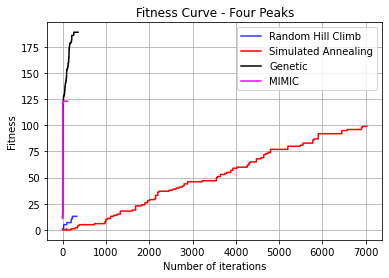

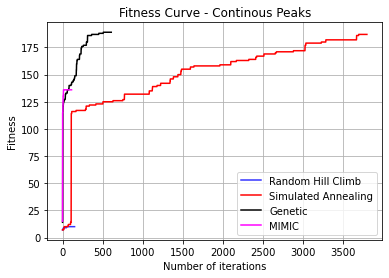

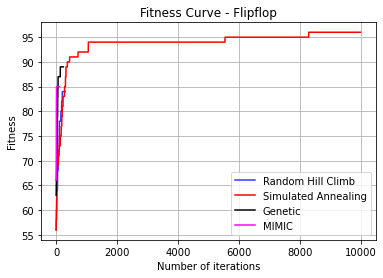

In [5]:
index_range = 100
fourpeaks_fitness = mlrose.FourPeaks(t_pct=0.1)
continous_peaks_fitness = mlrose.ContinuousPeaks(t_pct=0.1)
flipflop_fitness = mlrose.FlipFlop()
exp_decay = mlrose.ExpDecay()


problem_name = "Four Peaks"
fitness = fourpeaks_fitness
print(problem_name)

init_state = np.random.randint(2, size=index_range)
problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)

best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
		problem, init_state=init_state, max_attempts=100, max_iters=10000, curve=True)
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
			 problem, schedule = exp_decay, init_state = init_state,
			 max_attempts = 100, max_iters = 10000,curve=True)
best_state_genetic, best_fitness_genetic, fitness_curve_genetic = mlrose.genetic_alg(
	    problem, max_attempts=100, curve=True)
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(
	    problem, pop_size=200, max_attempts=100, curve=True)

plt.figure()
plt.title('Fitness Curve - ' + problem_name)

plt.plot(fitness_curve_rhc[:,0], label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing', color= 'red')
plt.plot(fitness_curve_genetic[:,0], label = 'Genetic', color = 'black')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC', color = 'magenta')

plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')

plt.legend(loc="best")
plt.savefig(problem_name + '_iterations_' + '_fitness.png', bbox_inches="tight")


problem_name = "Continous Peaks"
fitness = continous_peaks_fitness
print(problem_name)

init_state = np.random.randint(2, size=index_range)
problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)

best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
		problem, init_state=init_state, max_attempts=100, max_iters=10000, curve=True)
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
			 problem, schedule = exp_decay, init_state = init_state,
			 max_attempts = 100, max_iters = 10000,curve=True)
best_state_genetic, best_fitness_genetic, fitness_curve_genetic = mlrose.genetic_alg(
	    problem, max_attempts=100, curve=True)
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(
	    problem, pop_size=200, max_attempts=100, curve=True)

plt.figure()
plt.title('Fitness Curve - ' + problem_name)

plt.plot(fitness_curve_rhc[:,0], label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing', color= 'red')
plt.plot(fitness_curve_genetic[:,0], label = 'Genetic', color = 'black')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC', color = 'magenta')

plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')

plt.legend(loc="best")
plt.savefig(problem_name +'_iterations_' + '_fitness.png', bbox_inches="tight")

problem_name = "Flipflop"
fitness = flipflop_fitness
print(problem_name)

init_state = np.random.randint(2, size=index_range)
problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)

best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
		problem, init_state=init_state, max_attempts=100, max_iters=10000, curve=True)
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
			 problem, schedule = exp_decay, init_state = init_state,
			 max_attempts = 100, max_iters = 10000,curve=True)
best_state_genetic, best_fitness_genetic, fitness_curve_genetic = mlrose.genetic_alg(
	    problem, max_attempts=100, curve=True)
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(
	    problem, pop_size=200, max_attempts=100, curve=True)

print(problem.fitness_evaluations)

plt.figure()
plt.title('Fitness Curve - ' + problem_name)

plt.plot(fitness_curve_rhc[:,0], label = 'Random Hill Climb', color = 'blue', alpha = 0.8)
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing', color= 'red')
plt.plot(fitness_curve_genetic[:,0], label = 'Genetic', color = 'black')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC', color = 'magenta')

plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')

plt.legend(loc="best")
plt.savefig(problem_name +'_iterations_' + '_fitness.png', bbox_inches="tight")

#### performance with changing hyper-parameters - Four_Peaks

Four_Peaks
RHC
SA
GA
MIMIC


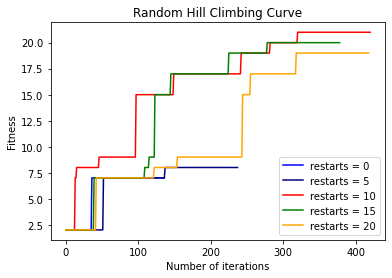

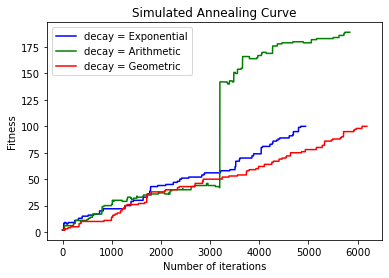

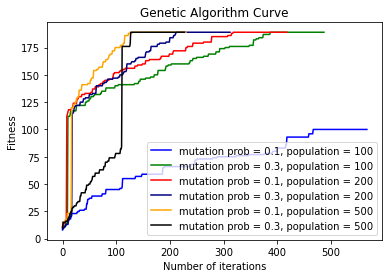

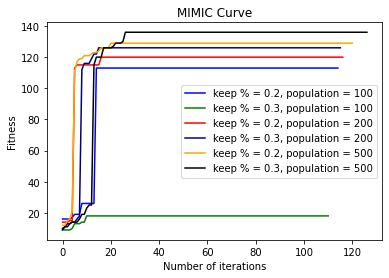

In [6]:
## Plot variation in performance with changing hyper-parameters

index_range = 100
maximum_attempts = 100
maximum_iterations = 10000
fourpeaks_fitness = mlrose.FourPeaks(t_pct=0.1)
continous_peaks_fitness = mlrose.ContinuousPeaks(t_pct=0.1)
flipflop_fitness = mlrose.FlipFlop()


problem_name = "Four_Peaks"
fitness = fourpeaks_fitness
print(problem_name)

init_state = np.random.randint(2, size=index_range)
problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)

# RHC 
_, _, rhc_fitness_curve_1 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 0, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_2 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 5, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_3 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 10, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_4 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 15, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_5 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 20, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
print('RHC')

# SA
_, _, sa_fitness_curve_1 = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations,curve = True)
_, _, sa_fitness_curve_2 = mlrose.simulated_annealing(problem, schedule = mlrose.ArithDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, sa_fitness_curve_3 = mlrose.simulated_annealing(problem, schedule = mlrose.GeomDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations,  curve = True)
print('SA')

# GA
_, _, ga_fitness_curve_1 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_2 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_3 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_4 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_5 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_6 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = maximum_attempts, curve = True)
print('GA')

# MIMIC
_, _, mimic_fitness_curve_1 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_2 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_3 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_4 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_5 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 500, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_6 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = maximum_attempts, curve = True)
print('MIMIC')


# RHC
plt.figure()
plt.plot(rhc_fitness_curve_1[:,0], label = 'restarts = 0', color = 'blue')
plt.plot(rhc_fitness_curve_2[:,0], label = 'restarts = 5', color = 'navy')
plt.plot(rhc_fitness_curve_3[:,0], label = 'restarts = 10', color = 'red')
plt.plot(rhc_fitness_curve_4[:,0], label = 'restarts = 15', color= 'green')
plt.plot(rhc_fitness_curve_5[:,0], label = 'restarts = 20', color = 'orange')
plt.title('Random Hill Climbing Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_rhc.png', bbox_inches="tight")


# SA
plt.figure()
plt.plot(sa_fitness_curve_1[:,0], label = 'decay = Exponential', color = 'blue')
plt.plot(sa_fitness_curve_2[:,0], label = 'decay = Arithmetic', color = 'green')
plt.plot(sa_fitness_curve_3[:,0], label = 'decay = Geometric', color = 'red')
plt.title('Simulated Annealing Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_sa.png', bbox_inches="tight")


# GA
plt.figure()
plt.plot(ga_fitness_curve_1[:,0], label = 'mutation prob = 0.1, population = 100', color = 'blue')
plt.plot(ga_fitness_curve_2[:,0], label = 'mutation prob = 0.3, population = 100', color = 'green')
plt.plot(ga_fitness_curve_3[:,0], label = 'mutation prob = 0.1, population = 200', color = 'red')
plt.plot(ga_fitness_curve_4[:,0], label = 'mutation prob = 0.3, population = 200', color = 'navy')
plt.plot(ga_fitness_curve_5[:,0], label = 'mutation prob = 0.1, population = 500', color = 'orange')
plt.plot(ga_fitness_curve_6[:,0], label = 'mutation prob = 0.3, population = 500', color = 'black')
plt.title('Genetic Algorithm Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_ga.png', bbox_inches="tight")


# MIMIC
plt.figure()
plt.plot(mimic_fitness_curve_1[:,0], label = 'keep % = 0.2, population = 100', color = 'blue')
plt.plot(mimic_fitness_curve_2[:,0], label = 'keep % = 0.3, population = 100', color = 'green')
plt.plot(mimic_fitness_curve_3[:,0], label = 'keep % = 0.2, population = 200', color = 'red')
plt.plot(mimic_fitness_curve_4[:,0], label = 'keep % = 0.3, population = 200', color = 'navy')
plt.plot(mimic_fitness_curve_5[:,0], label = 'keep % = 0.2, population = 500', color = 'orange')
plt.plot(mimic_fitness_curve_6[:,0], label = 'keep % = 0.3, population = 500', color = 'black')
plt.title('MIMIC Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_mimic.png', bbox_inches="tight")

#### performance with changing hyper-parameters - Continuous Peaks

Continuous_Peaks
RHC
SA
GA
MIMIC


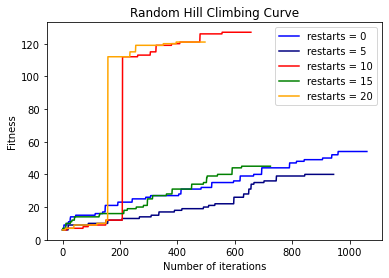

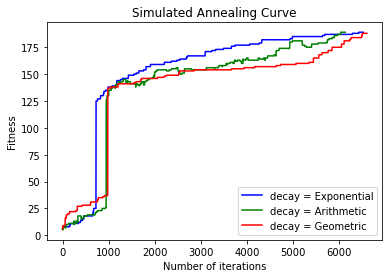

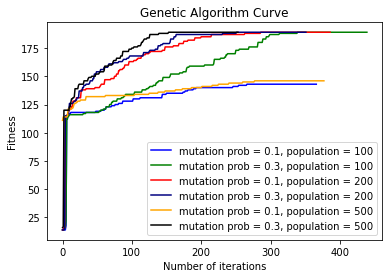

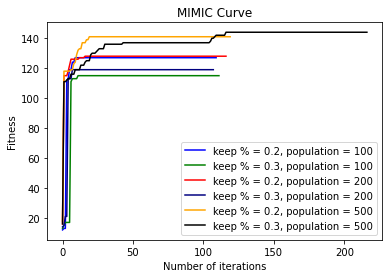

In [7]:
## Plot variation in performance with changing hyper-parameters

index_range = 100
maximum_attempts = 100
maximum_iterations = 10000
fourpeaks_fitness = mlrose.FourPeaks(t_pct=0.1)
continous_peaks_fitness = mlrose.ContinuousPeaks(t_pct=0.1)
flipflop_fitness = mlrose.FlipFlop()


problem_name = "Continuous_Peaks"
fitness = continous_peaks_fitness
print(problem_name)

init_state = np.random.randint(2, size=index_range)
problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)

# RHC 
_, _, rhc_fitness_curve_1 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 0, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_2 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 5, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_3 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 10, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_4 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 15, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_5 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 20, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
print('RHC')

# SA
_, _, sa_fitness_curve_1 = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations,curve = True)
_, _, sa_fitness_curve_2 = mlrose.simulated_annealing(problem, schedule = mlrose.ArithDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, sa_fitness_curve_3 = mlrose.simulated_annealing(problem, schedule = mlrose.GeomDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations,  curve = True)
print('SA')

# GA
_, _, ga_fitness_curve_1 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_2 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_3 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_4 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_5 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_6 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = maximum_attempts, curve = True)
print('GA')

# MIMIC
_, _, mimic_fitness_curve_1 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_2 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_3 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_4 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_5 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 500, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_6 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = maximum_attempts, curve = True)
print('MIMIC')


# RHC
plt.figure()
plt.plot(rhc_fitness_curve_1[:,0], label = 'restarts = 0', color = 'blue')
plt.plot(rhc_fitness_curve_2[:,0], label = 'restarts = 5', color = 'navy')
plt.plot(rhc_fitness_curve_3[:,0], label = 'restarts = 10', color = 'red')
plt.plot(rhc_fitness_curve_4[:,0], label = 'restarts = 15', color= 'green')
plt.plot(rhc_fitness_curve_5[:,0], label = 'restarts = 20', color = 'orange')
plt.title('Random Hill Climbing Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_rhc.png', bbox_inches="tight")


# SA
plt.figure()
plt.plot(sa_fitness_curve_1[:,0], label = 'decay = Exponential', color = 'blue')
plt.plot(sa_fitness_curve_2[:,0], label = 'decay = Arithmetic', color = 'green')
plt.plot(sa_fitness_curve_3[:,0], label = 'decay = Geometric', color = 'red')
plt.title('Simulated Annealing Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_sa.png', bbox_inches="tight")


# GA
plt.figure()
plt.plot(ga_fitness_curve_1[:,0], label = 'mutation prob = 0.1, population = 100', color = 'blue')
plt.plot(ga_fitness_curve_2[:,0], label = 'mutation prob = 0.3, population = 100', color = 'green')
plt.plot(ga_fitness_curve_3[:,0], label = 'mutation prob = 0.1, population = 200', color = 'red')
plt.plot(ga_fitness_curve_4[:,0], label = 'mutation prob = 0.3, population = 200', color = 'navy')
plt.plot(ga_fitness_curve_5[:,0], label = 'mutation prob = 0.1, population = 500', color = 'orange')
plt.plot(ga_fitness_curve_6[:,0], label = 'mutation prob = 0.3, population = 500', color = 'black')
plt.title('Genetic Algorithm Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_ga.png', bbox_inches="tight")


# MIMIC
plt.figure()
plt.plot(mimic_fitness_curve_1[:,0], label = 'keep % = 0.2, population = 100', color = 'blue')
plt.plot(mimic_fitness_curve_2[:,0], label = 'keep % = 0.3, population = 100', color = 'green')
plt.plot(mimic_fitness_curve_3[:,0], label = 'keep % = 0.2, population = 200', color = 'red')
plt.plot(mimic_fitness_curve_4[:,0], label = 'keep % = 0.3, population = 200', color = 'navy')
plt.plot(mimic_fitness_curve_5[:,0], label = 'keep % = 0.2, population = 500', color = 'orange')
plt.plot(mimic_fitness_curve_6[:,0], label = 'keep % = 0.3, population = 500', color = 'black')
plt.title('MIMIC Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_mimic.png', bbox_inches="tight")

#### performance with changing hyper-parameters - FlipFlop

FlipFlop
RHC
SA
GA
MIMIC


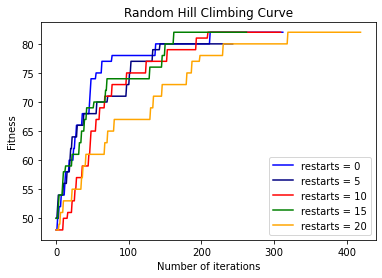

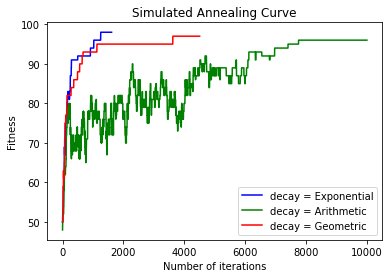

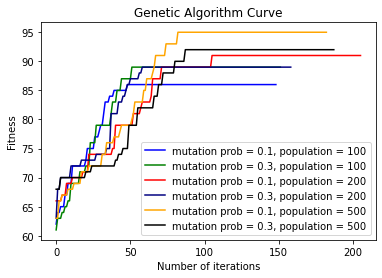

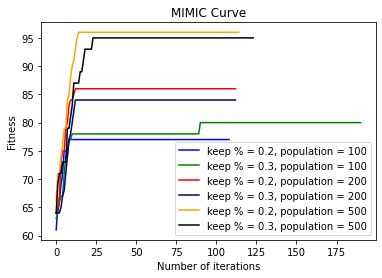

In [8]:
## Plot variation in performance with changing hyper-parameters

index_range = 100
maximum_attempts = 100
maximum_iterations = 10000
fourpeaks_fitness = mlrose.FourPeaks(t_pct=0.1)
continous_peaks_fitness = mlrose.ContinuousPeaks(t_pct=0.1)
flipflop_fitness = mlrose.FlipFlop()


problem_name = "FlipFlop"
fitness = flipflop_fitness
print(problem_name)

init_state = np.random.randint(2, size=index_range)
problem = mlrose.DiscreteOpt(length=index_range, fitness_fn=fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)

# RHC 
_, _, rhc_fitness_curve_1 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 0, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_2 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 5, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_3 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 10, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_4 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 15, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, rhc_fitness_curve_5 = mlrose.random_hill_climb(problem, init_state = init_state, restarts = 20, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
print('RHC')

# SA
_, _, sa_fitness_curve_1 = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations,curve = True)
_, _, sa_fitness_curve_2 = mlrose.simulated_annealing(problem, schedule = mlrose.ArithDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations, curve = True)
_, _, sa_fitness_curve_3 = mlrose.simulated_annealing(problem, schedule = mlrose.GeomDecay(), init_state = init_state, max_attempts = maximum_attempts, max_iters = maximum_iterations,  curve = True)
print('SA')

# GA
_, _, ga_fitness_curve_1 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_2 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_3 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_4 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_5 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 500, max_attempts = maximum_attempts, curve = True)
_, _, ga_fitness_curve_6 = mlrose.genetic_alg(problem, mutation_prob = 0.3, pop_size = 500, max_attempts = maximum_attempts, curve = True)
print('GA')

# MIMIC
_, _, mimic_fitness_curve_1 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_2 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 100, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_3 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_4 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 200, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_5 = mlrose.mimic(problem, keep_pct = 0.2, pop_size = 500, max_attempts = maximum_attempts, curve = True)
_, _, mimic_fitness_curve_6 = mlrose.mimic(problem, keep_pct = 0.3, pop_size = 500, max_attempts = maximum_attempts, curve = True)
print('MIMIC')


# RHC
plt.figure()
plt.plot(rhc_fitness_curve_1[:,0], label = 'restarts = 0', color = 'blue')
plt.plot(rhc_fitness_curve_2[:,0], label = 'restarts = 5', color = 'navy')
plt.plot(rhc_fitness_curve_3[:,0], label = 'restarts = 10', color = 'red')
plt.plot(rhc_fitness_curve_4[:,0], label = 'restarts = 15', color= 'green')
plt.plot(rhc_fitness_curve_5[:,0], label = 'restarts = 20', color = 'orange')
plt.title('Random Hill Climbing Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_rhc.png', bbox_inches="tight")


# SA
plt.figure()
plt.plot(sa_fitness_curve_1[:,0], label = 'decay = Exponential', color = 'blue')
plt.plot(sa_fitness_curve_2[:,0], label = 'decay = Arithmetic', color = 'green')
plt.plot(sa_fitness_curve_3[:,0], label = 'decay = Geometric', color = 'red')
plt.title('Simulated Annealing Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_sa.png', bbox_inches="tight")


# GA
plt.figure()
plt.plot(ga_fitness_curve_1[:,0], label = 'mutation prob = 0.1, population = 100', color = 'blue')
plt.plot(ga_fitness_curve_2[:,0], label = 'mutation prob = 0.3, population = 100', color = 'green')
plt.plot(ga_fitness_curve_3[:,0], label = 'mutation prob = 0.1, population = 200', color = 'red')
plt.plot(ga_fitness_curve_4[:,0], label = 'mutation prob = 0.3, population = 200', color = 'navy')
plt.plot(ga_fitness_curve_5[:,0], label = 'mutation prob = 0.1, population = 500', color = 'orange')
plt.plot(ga_fitness_curve_6[:,0], label = 'mutation prob = 0.3, population = 500', color = 'black')
plt.title('Genetic Algorithm Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_ga.png', bbox_inches="tight")


# MIMIC
plt.figure()
plt.plot(mimic_fitness_curve_1[:,0], label = 'keep % = 0.2, population = 100', color = 'blue')
plt.plot(mimic_fitness_curve_2[:,0], label = 'keep % = 0.3, population = 100', color = 'green')
plt.plot(mimic_fitness_curve_3[:,0], label = 'keep % = 0.2, population = 200', color = 'red')
plt.plot(mimic_fitness_curve_4[:,0], label = 'keep % = 0.3, population = 200', color = 'navy')
plt.plot(mimic_fitness_curve_5[:,0], label = 'keep % = 0.2, population = 500', color = 'orange')
plt.plot(mimic_fitness_curve_6[:,0], label = 'keep % = 0.3, population = 500', color = 'black')
plt.title('MIMIC Curve')
plt.legend(loc="best")
plt.xlabel('Number of iterations')
plt.ylabel('Fitness')
plt.savefig(problem_name + '_hyperparameter_' + '_mimic.png', bbox_inches="tight")

# Neural Network model - Optimize weights


In [39]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

In [40]:
diabetes_df = pd.read_csv('data/diabetes.csv', sep=',').dropna().reset_index(drop=True)
#diabetes_df.head()
#y = diabetes_df['Outcome']
#X = diabetes_df.drop(columns='Outcome')

#X = diabetes_df.iloc[:, 0:8].values
#y = diabetes_df.iloc[:, -1].values

wine_quality_df = pd.read_csv('data/winequality-white.csv', sep=';')
y = wine_quality_df['quality'] >= 7
X = wine_quality_df.drop(columns='quality')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Total number of records: ' + str(len(X)))

Total number of records: 4898


In [41]:
a_y_train = np.asarray(y_train)
a_y_test  = np.asarray(y_test)

# One hot encode target values
one_hot_encoder = OneHotEncoder()
y_train_hot = one_hot_encoder.fit_transform(a_y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot_encoder.transform(a_y_test.reshape(-1, 1)).todense()

# normalize x
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
#gradient_descent

Training time: 41.54653310775757
Accuracy: 0.7683673469387755
[1, 'gradient_descent', 0.21260847371107708, 0.2316326530612245]
[51, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[101, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[151, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[201, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[251, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[301, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[351, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[401, 'gradient_descent', 0.787391526288923, 0.7683673469387755]
[451, 'gradient_descent', 0.7871362940275651, 0.7683673469387755]


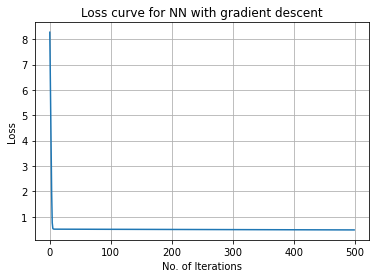

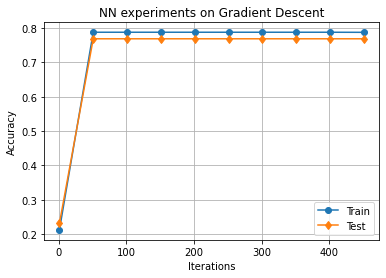

In [43]:
#gradient_descent
mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, 100, 50, 50], activation='sigmoid',
                               algorithm='gradient_descent', early_stopping=False,
                               max_attempts=100, max_iters=500, clip_max=5,
                               bias=True, learning_rate=0.00001,
                               curve=True, random_state=42)

start_time = time.time()
mlp_clf.fit(X_train_scaled, y_train_hot)
end_time = time.time()
training_time = end_time - start_time

y_predicted = mlp_clf.predict(X_test_scaled)
score = metrics.accuracy_score(y_test_hot, y_predicted)
fitness_curve = mlp_clf.fitness_curve

print('Training time:', training_time)
print('Accuracy:', score)

fitness_curve = [-x for x in fitness_curve]

plt.figure()

plt.plot(fitness_curve)
plt.xlabel("No. of Iterations")
plt.ylabel("Loss")
plt.title('Loss curve for NN with gradient descent')
plt.grid()
plt.savefig('gradient_descent_Loss_Curve.png')

results = []
for index in range(1, 500, 50):
    mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, 100, 50, 50], activation='sigmoid',
                                   algorithm='gradient_descent', early_stopping=False,
                                   max_attempts=100, max_iters=index, clip_max=5,
                                   bias=True, learning_rate=0.00001,
                                   curve=False, random_state=42)
    mlp_clf.fit(X_train_scaled, y_train_hot)
    y_train_predicted = mlp_clf.predict(X_train_scaled)
    y_train_accuracy = metrics.accuracy_score(y_train_hot, y_train_predicted)

    y_predicted = mlp_clf.predict(X_test_scaled)
    y_test_accuracy = metrics.accuracy_score(y_test_hot, y_predicted)

    results.append([index, 'gradient_descent', y_train_accuracy, y_test_accuracy])
    print([index, 'gradient_descent', y_train_accuracy, y_test_accuracy])

#plot learning curve
df_data = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train_Accuracy", "Test_Accuracy"])

plt.figure()
plt.plot(df_data['Iterations'], df_data['Train_Accuracy'], marker='o')
plt.ylabel('Accuracy')
plt.title('NN experiments on Gradient Descent')

plt.plot(df_data['Iterations'], df_data['Test_Accuracy'], marker='d')
plt.xlabel('Iterations')

plt.legend(['Train', 'Test'])
plt.grid()
plt.savefig('gradient_descent_Learning_Curve.png')

In [44]:
# RHC

Training time: 17.39496159553528
Accuracy: 0.2316326530612245
[1, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[51, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[101, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[151, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[201, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[251, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[301, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[351, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[401, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]
[451, 'random_hill_climb', 0.21260847371107708, 0.2316326530612245]


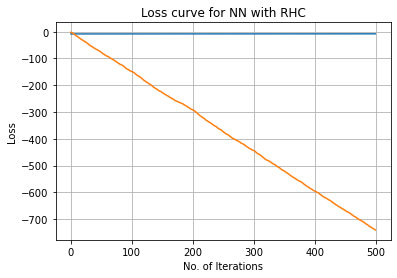

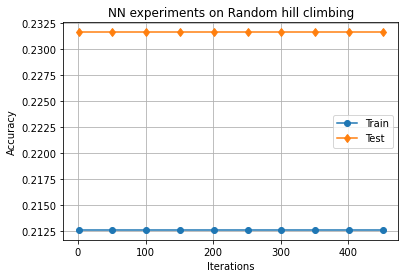

In [45]:
# RHC
mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, 100, 50, 50], activation='sigmoid',
                               algorithm='random_hill_climb', early_stopping=False,
                               max_attempts=100, max_iters=500, clip_max=5,
                               bias=True, learning_rate=0.1,
                               curve=True, random_state=42)
start_time = time.time()
mlp_clf.fit(X_train_scaled, y_train_hot)
end_time = time.time()
training_time = end_time - start_time

y_predicted = mlp_clf.predict(X_test_scaled)
rhc_score = metrics.accuracy_score(y_test_hot, y_predicted)
rhc_fitness_curve = mlp_clf.fitness_curve

print('Training time:', training_time)
print('Accuracy:', rhc_score)


plt.figure()

plt.plot(-rhc_fitness_curve)
plt.xlabel("No. of Iterations")
plt.ylabel("Loss")
plt.title('Loss curve for NN with RHC')
plt.grid()
plt.savefig('RHC_Loss_Curve.png')

results = []

for index in range(1, 500, 50):
    mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, 100, 50, 50], activation='sigmoid',
                                   algorithm='random_hill_climb', early_stopping=False,
                                   max_attempts=100, max_iters=index, clip_max=5,
                                   bias=True, learning_rate=0.1,
                                   curve=False, random_state=42)
    mlp_clf.fit(X_train_scaled, y_train_hot)
    y_train_predicted = mlp_clf.predict(X_train_scaled)
    y_train_accuracy = metrics.accuracy_score(y_train_hot, y_train_predicted)

    y_predicted = mlp_clf.predict(X_test_scaled)
    y_test_accuracy = metrics.accuracy_score(y_test_hot, y_predicted)

    results.append([index, 'random_hill_climb', y_train_accuracy, y_test_accuracy])
    print([index, 'random_hill_climb', y_train_accuracy, y_test_accuracy])

#Learning curve
df_data = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train_Accuracy", "Test_Accuracy"])
plt.figure()
plt.plot(df_data['Iterations'], df_data['Train_Accuracy'], marker='o')
plt.ylabel('Accuracy')
plt.title('NN experiments on Random hill climbing')
plt.plot(df_data['Iterations'], df_data['Test_Accuracy'], marker='d')
plt.xlabel('Iterations')
plt.legend(['Train', 'Test'])
plt.grid()
plt.savefig('RHC_Learning_Curve.png')

In [46]:
#SA

Training time: 22.9331693649292
Accuracy: 0.7683673469387755
[1, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[51, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[101, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[151, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[201, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[251, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[301, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[351, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[401, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]
[451, 'simulated_annealing', 0.787391526288923, 0.7683673469387755]


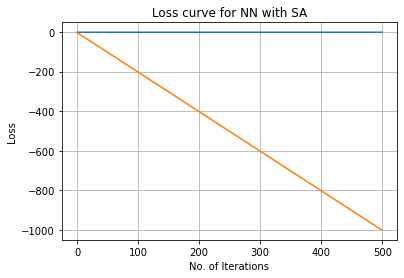

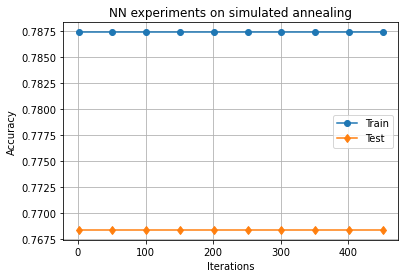

In [47]:
#SA
mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, 100, 50, 50], activation='sigmoid',
                               algorithm='simulated_annealing', early_stopping=False,
                               max_attempts=100, max_iters=500, clip_max=5,
                               bias=True, learning_rate=0.1,
                               schedule=mlrose.GeomDecay(init_temp=100, decay=0.1, min_temp=1),
                               curve=True, random_state=1)
start_time = time.time()
mlp_clf.fit(X_train_scaled, y_train_hot)
end_time = time.time()
training_time = end_time - start_time

y_predicted = mlp_clf.predict(X_test_scaled)
sa_score = metrics.accuracy_score(y_test_hot, y_predicted)
sa_fitness_curve = mlp_clf.fitness_curve

print('Training time:', training_time)
print('Accuracy:', sa_score)

plt.figure()

plt.plot(-sa_fitness_curve)
plt.xlabel("No. of Iterations")
plt.ylabel("Loss")
plt.title('Loss curve for NN with SA')
plt.grid()
plt.savefig('SA_Loss_Curve.png')

results = []

for index in range(1, 500, 50):
    mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, 100, 50, 50], activation='sigmoid',
                                   algorithm='simulated_annealing', early_stopping=False,
                                   max_attempts=100, max_iters=index, clip_max=5,
                                   bias=True, learning_rate=0.1,
                                   schedule=mlrose.GeomDecay(init_temp=100, decay=0.1, min_temp=1),
                                   curve=False, random_state=1)
    mlp_clf.fit(X_train_scaled, y_train_hot)
    y_train_predicted = mlp_clf.predict(X_train_scaled)
    y_train_accuracy = metrics.accuracy_score(y_train_hot, y_train_predicted)

    y_predicted = mlp_clf.predict(X_test_scaled)
    y_test_accuracy = metrics.accuracy_score(y_test_hot, y_predicted)

    results.append([index, 'simulated_annealing', y_train_accuracy, y_test_accuracy])
    print([index, 'simulated_annealing', y_train_accuracy, y_test_accuracy])

#Learning curve
df_data = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train_Accuracy", "Test_Accuracy"])
plt.figure()
plt.plot(df_data['Iterations'], df_data['Train_Accuracy'], marker='o')
plt.ylabel('Accuracy')
plt.title('NN experiments on simulated annealing')
plt.plot(df_data['Iterations'], df_data['Test_Accuracy'], marker='d')
plt.xlabel('Iterations')
plt.legend(['Train', 'Test'])
plt.grid()
plt.savefig('SA_Learning_Curve.png')

In [48]:
#GA

Training time: 95.86545586585999
Accuracy: 0.7846938775510204
[100, 0.01, 500, 64.18367346938776, 5.321302652359009]
[100, 0.05, 500, 76.93877551020408, 5.4138782024383545]
[100, 0.1, 500, 72.75510204081633, 5.52728796005249]
[200, 0.01, 500, 74.08163265306122, 10.612036943435669]
[200, 0.05, 500, 67.24489795918367, 10.758088111877441]
[200, 0.1, 500, 74.28571428571429, 11.865227222442627]
[500, 0.01, 500, 72.55102040816327, 28.69973611831665]
[500, 0.05, 500, 73.77551020408163, 29.700836658477783]
[500, 0.1, 500, 76.73469387755102, 32.64297866821289]


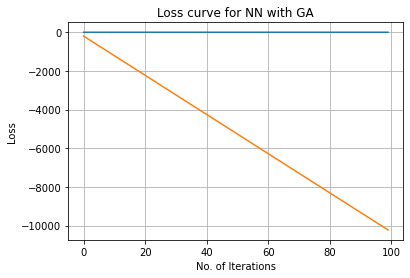

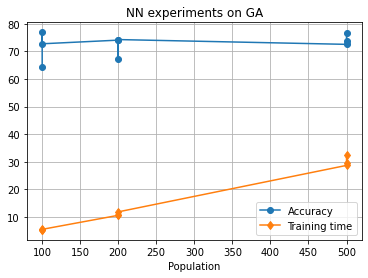

In [56]:
#GA
results = []

max_iterations = 5

pop_size_list = [100, 200, 500]
mutation_prob_list = [0.01, 0.05, 0.1]

mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, ], activation='sigmoid',
                               algorithm='genetic_alg', early_stopping=False,
                               max_attempts=100, max_iters=100, clip_max=5,
                               bias=True, learning_rate=0.1, pop_size=100, mutation_prob=0.001,
                               curve=True, random_state=42)
start_time = time.time()
mlp_clf.fit(X_train_scaled, y_train_hot)
end_time = time.time()
training_time = end_time - start_time
y_predicted = mlp_clf.predict(X_test_scaled)
ga_score = metrics.accuracy_score(y_test_hot, y_predicted)
ga_fitness_curve = mlp_clf.fitness_curve

print('Training time:', training_time)
print('Accuracy:', ga_score)

plt.figure()

plt.plot(-ga_fitness_curve)
plt.xlabel("No. of Iterations")
plt.ylabel("Loss")
plt.title('Loss curve for NN with GA')
plt.grid()
plt.savefig('GA_Loss_Curve.png')

# run generic algorithm
for pop in pop_size_list:
    for mutation in mutation_prob_list:
        mlp_clf = mlrose.NeuralNetwork(hidden_nodes=[100, ], activation='sigmoid',
                                       algorithm='genetic_alg', early_stopping=False,
                                       max_attempts=100, max_iters=max_iterations, clip_max=5,
                                       bias=True, learning_rate=0.1, pop_size=pop, mutation_prob=mutation,
                                       curve=False, random_state=42)
        start_time = time.time()
        mlp_clf.fit(X_train_scaled, y_train_hot)
        end_time = time.time()
        training_time = end_time - start_time

        y_predicted = mlp_clf.predict(X_test_scaled)
        ga_score = metrics.accuracy_score(y_test_hot, y_predicted)

        results.append([pop, mutation, max_attempt, 'GA', ga_score * 100, training_time])
        print([pop, mutation, max_attempt, ga_score * 100, training_time])

#Learning curve
df_data = pd.DataFrame(results, columns=["Population", "Mutation", 'max_attempt', "Algorithm", "Accuracy", "Training time"])
plt.figure()
plt.plot(df_data['Population'], df_data['Accuracy'], marker='o')
plt.title('NN experiments on GA')
plt.plot(df_data['Population'], df_data['Training time'], marker='d')
plt.xlabel('Population')
plt.legend(['Accuracy', 'Training time'])
plt.grid()
plt.savefig('GA_Learning_Curve.png')